<a href="https://colab.research.google.com/github/Clalva02/TFG/blob/main/TFG_Particulas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sklearn.metrics
import tensorflow as tf

In [3]:
import torch
import numpy as np 
from pathlib import Path, PurePath
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from google.colab import drive
from skimage.transform import rescale, resize, downscale_local_mean


In [4]:
def auto_crop(ori_img = None, dim = 30):
	row_ind = min(ori_img.nonzero()[0][-1] + 2, ori_img.shape[0])
	col_ind = min(ori_img.nonzero()[1][-1] + 2, ori_img.shape[1])
	res = ori_img[row_ind - dim :row_ind, col_ind - dim:col_ind]
	return res


def block_mean(ar, fact):
	assert isinstance(fact, int), type(fact)
	sx, sy = ar.shape
	X, Y = np.ogrid[0:sx, 0:sy]
	regions = sy/fact * (X/fact) + Y/fact
	res = ndimage.mean(ar, labels=regions, index=np.arange(regions.max() + 1))
	res.shape = (sx/fact, sy/fact)
	return res

def load_single_class(class_title = None, downscale = True, autocrop = False):
	path = "/content/drive/MyDrive/TFG/QCNN_datashare/QCNN_datashare/sample1"
	class_files = []
	for f in listdir(join(path, class_title)):
		if f.endswith(".npy"):
			class_files.append(f)

	class_img_list = []
	for item in class_files:
		class_img = np.load(join(path,class_title,item))
		if downscale == True:
			class_img = downscale_local_mean(class_img, (20, 16))
		if autocrop == True:
			class_img = auto_crop(ori_img = class_img, dim = 30)

		class_img_list.append(class_img)

	return np.array(class_img_list)

In [ ]:
x_1 = load_single_class(class_title = 'mu+', downscale = True)
x_2 = load_single_class(class_title = 'e-', downscale = True)
x_3 = load_single_class(class_title = 'p+', downscale = True)
x_4 = load_single_class(class_title = 'pi+', downscale = True)

In [ ]:
x_1.shape,x_2.shape,x_3.shape,x_4.shape

In [ ]:
y_1=0*np.ones((100,1))
y_2=1*np.ones((100,1))
y_3=2*np.ones((100,1))
y_4=3*np.ones((100,1))
X=np.concatenate((x_1,x_2,x_3,x_4),axis=0)
Y4=np.concatenate((y_1,y_2,y_3,y_4),axis=0)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y4, random_state=42)

In [ ]:
X_train=X_train.astype('float32')/np.amax(X)
X_test=X_test.astype('float32')/np.amax(X)
X_train = X_train.reshape((X_train.shape[0], 30, 30, 1))
X_test = X_test.reshape((X_test.shape[0], 30, 30, 1))
Y_train = to_categorical(Y_train)
Y_test= to_categorical(Y_test)

In [ ]:
f, ax = plt.subplots(1, 4,figsize=(20,20))
ax[0].imshow(x_1[0], origin='lower', cmap='YlGnBu', norm=LogNorm())
ax[1].imshow(x_2[0], origin='lower', cmap='YlGnBu', norm=LogNorm())
ax[2].imshow(x_3[3], origin='lower', cmap='YlGnBu', norm=LogNorm())
ax[3].imshow(x_4[1], origin='lower', cmap='YlGnBu', norm=LogNorm())
ax[0].set_title('$\mu^+$').set_fontsize(20)
ax[1].set_title('$e^-$').set_fontsize(20)
ax[2].set_title('$p^+$').set_fontsize(20)
ax[3].set_title('$\pi^+$').set_fontsize(20)
for i in range(4):
  ax[i].set_xticklabels('')
  ax[i].set_yticklabels('')
f.tight_layout()
plt.show()

In [ ]:
X_train2=np.reshape(X_train,(300, 30*30))
X_test2=np.reshape(X_test,(100, 30*30))

In [ ]:
model = Sequential()
model.add(Dense(900, activation='relu', input_shape=(X_train2[0].shape)))
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

In [60]:
history=model.fit(X_train2, Y_train,validation_split = 0.25,epochs=30, verbose=1)

Epoch 1/30
8/8 [==============================] - 1s 44ms/step - loss: 0.6751 - accuracy: 0.2809 - val_loss: 0.6109 - val_accuracy: 0.2267
Epoch 2/30
8/8 [==============================] - 0s 19ms/step - loss: 0.5865 - accuracy: 0.2462 - val_loss: 0.5560 - val_accuracy: 0.2933
Epoch 3/30
8/8 [==============================] - 0s 18ms/step - loss: 0.5398 - accuracy: 0.3783 - val_loss: 0.5469 - val_accuracy: 0.2400
Epoch 4/30
8/8 [==============================] - 0s 17ms/step - loss: 0.5150 - accuracy: 0.3785 - val_loss: 0.5213 - val_accuracy: 0.5467
Epoch 5/30
8/8 [==============================] - 0s 18ms/step - loss: 0.4867 - accuracy: 0.6094 - val_loss: 0.4964 - val_accuracy: 0.5600
Epoch 6/30
8/8 [==============================] - 0s 17ms/step - loss: 0.4496 - accuracy: 0.6924 - val_loss: 0.4671 - val_accuracy: 0.5867
Epoch 7/30
8/8 [==============================] - 0s 18ms/step - loss: 0.4089 - accuracy: 0.7202 - val_loss: 0.4418 - val_accuracy: 0.5867
Epoch 8/30
8/8 [===========

4/4 [==============================] - 0s 5ms/step - loss: 0.4263 - accuracy: 0.6200


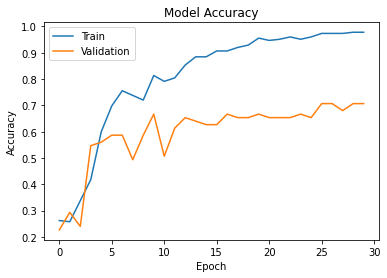

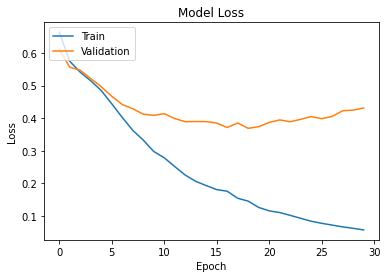

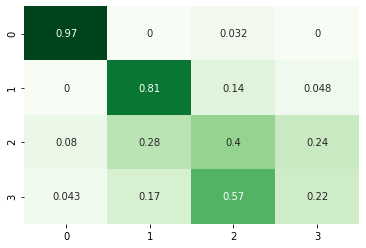

In [61]:
model.evaluate(X_test2, Y_test)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
#plt.savefig('/content/drive/MyDrive/TFG/CNN1/Acuracy.png')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
#plt.savefig('/content/drive/MyDrive/TFG/CNN1/Loss.png')
plt.show()
Y_pred=np.argmax(model.predict(X_test2),axis=1)
Y_test2=np.argmax(Y_test,axis=1)
confusion = sklearn.metrics.confusion_matrix(Y_test2,Y_pred,normalize='true')
import seaborn as sb
sb.heatmap(confusion,cbar=False,cmap='Greens',annot=True)
#plt.savefig('/content/drive/MyDrive/TFG/CNN1/CM.png')
plt.show()

In [63]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(X_train[0].shape)))
model.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((3, 3)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(50, activation='relu'))
model.add(Dense(4, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [64]:
steps = int(X_train.shape[0] / 8)
history = model.fit(X_train,Y_train,shuffle=True , epochs=30,batch_size= 5, validation_split=0.25, verbose=1)
_ , acc = model.evaluate(X_test, Y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

Epoch 1/30
45/45 [==============================] - 4s 67ms/step - loss: 1.3760 - accuracy: 0.3065 - val_loss: 1.3584 - val_accuracy: 0.4000
Epoch 2/30
45/45 [==============================] - 3s 60ms/step - loss: 1.3373 - accuracy: 0.5564 - val_loss: 1.3203 - val_accuracy: 0.4933
Epoch 3/30
45/45 [==============================] - 3s 57ms/step - loss: 1.2823 - accuracy: 0.5417 - val_loss: 1.2611 - val_accuracy: 0.4800
Epoch 4/30
45/45 [==============================] - 3s 57ms/step - loss: 1.2193 - accuracy: 0.5301 - val_loss: 1.1702 - val_accuracy: 0.5067
Epoch 5/30
45/45 [==============================] - 3s 58ms/step - loss: 1.0607 - accuracy: 0.5759 - val_loss: 1.0483 - val_accuracy: 0.5600
Epoch 6/30
45/45 [==============================] - 3s 57ms/step - loss: 1.0364 - accuracy: 0.5289 - val_loss: 0.9623 - val_accuracy: 0.5600
Epoch 7/30
45/45 [==============================] - 3s 56ms/step - loss: 0.8862 - accuracy: 0.6057 - val_loss: 0.9309 - val_accuracy: 0.5867
Epoch 8/30
45

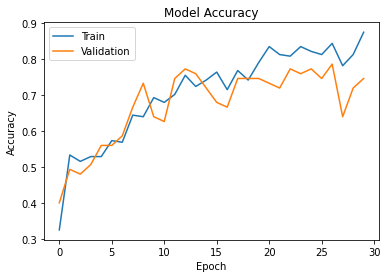

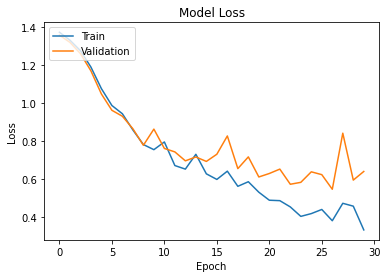

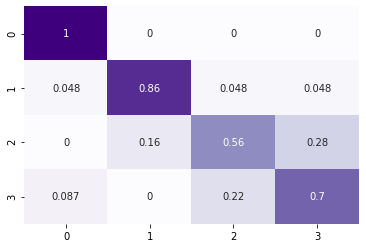

In [66]:
#model.save('/content/drive/MyDrive/TFG/CNN1')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
#plt.savefig('/content/drive/MyDrive/TFG/CNN1/Acuracy.png')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
#plt.savefig('/content/drive/MyDrive/TFG/CNN1/Loss.png')
plt.show()
Y_pred=np.argmax(model.predict(X_test),axis=1)
Y_testt=np.argmax(Y_test,axis=1)
confusion = sklearn.metrics.confusion_matrix(Y_testt,Y_pred,normalize='true')
import seaborn as sb
sb.heatmap(confusion,cbar=False,cmap='Purples',annot=True)
#plt.savefig('/content/drive/MyDrive/TFG/CNN1/CM.png')
plt.show()